In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os 
from mpl_toolkits.mplot3d import Axes3D


In [2]:
for dirc, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirc, filename))


In [3]:
bank_data = pd.read_csv(r'C:\Georgian College\BDAT 1004 - Data Programming\bank.csv', delimiter=',')
bank_data.dataframeName = 'bank.csv'
nRow, nCol = bank_data.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 11162 rows and 17 columns


In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
bank_data.duplicated().any()

False

In [7]:
#cheched for percentage of null values

In [8]:
missing_values = bank_data.isnull().mean()*100
missing_values.sum()

0.0

In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<AxesSubplot:>

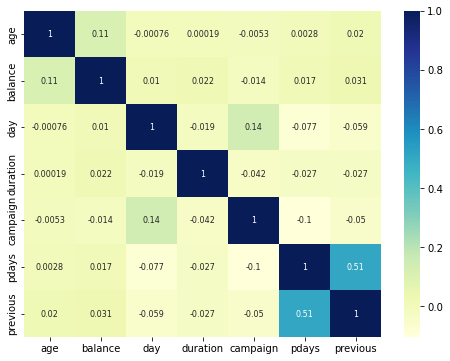

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(bank_data.corr(), annot = True, annot_kws={'size': 8}, cmap = 'YlGnBu')
# the correlation matrix is indicating that most of the variables in the data set are independent of one another

<AxesSubplot:ylabel='balance'>

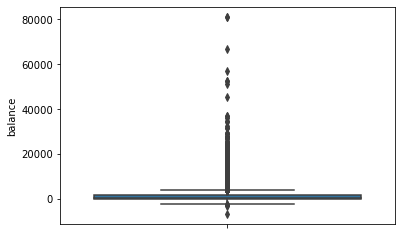

In [12]:
sns.boxplot(y='balance', data=bank_data)
# box plot is showing potential outliers, but these outliers are not removed from in this analysis because removing outliers would hamper the end result of analysis and would lead to wrong results.

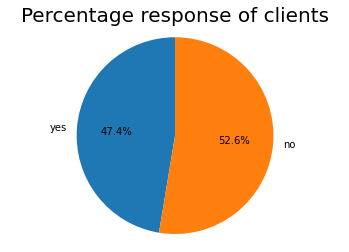

In [13]:
labels = bank_data['deposit'].unique()
fig1, ax1 = plt.subplots()

ax1.pie(bank_data['deposit'].value_counts(ascending=True), labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Percentage response of clients",fontsize=20)
plt.show()
# the pie chart is indicating the percentage success or failure of the campaign and is reflecting that campaign was 50% successful(50% unsuccesful)in persuading people.

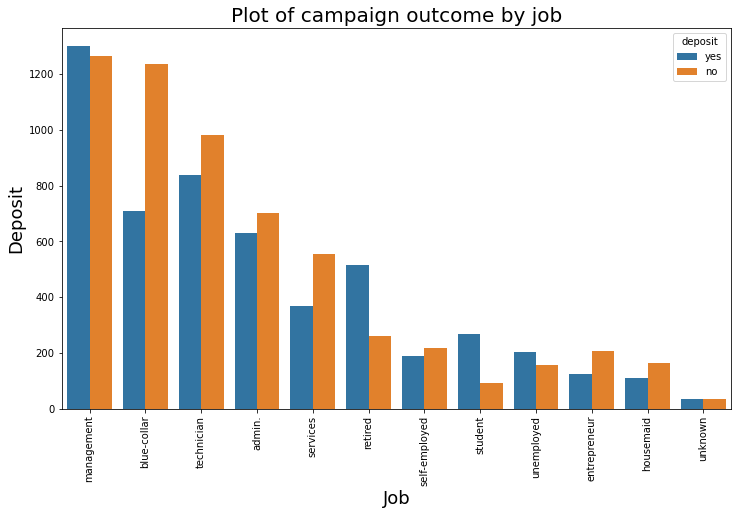

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(data=bank_data, x='job', order = bank_data['job'].value_counts().index, hue='deposit')
plt.xticks(rotation=90)
plt.title("Plot of campaign outcome by job",fontsize=20)
plt.xlabel('Job', fontsize=18)
plt.ylabel('Deposit', fontsize=18)
plt.show()
# it is clear that retired people and students are the group of people which should be targeted to get maximum positive result from the campaign.

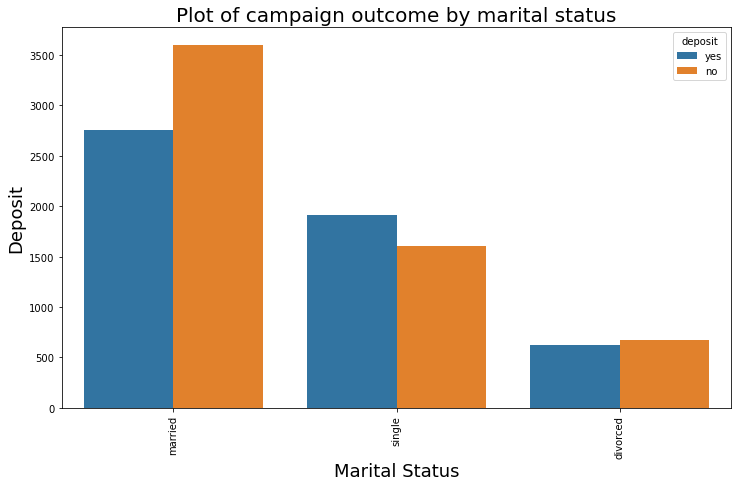

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data=bank_data, x='marital', order = bank_data['marital'].value_counts().index, hue='deposit')
plt.xticks(rotation=90)
plt.title("Plot of campaign outcome by marital status",fontsize=20)
plt.xlabel('Marital Status', fontsize=18)
plt.ylabel('Deposit', fontsize=18)
plt.show()
# the graph shows that campaign was unsuccesful in influencing married and divorced people, so focus should be on singles.

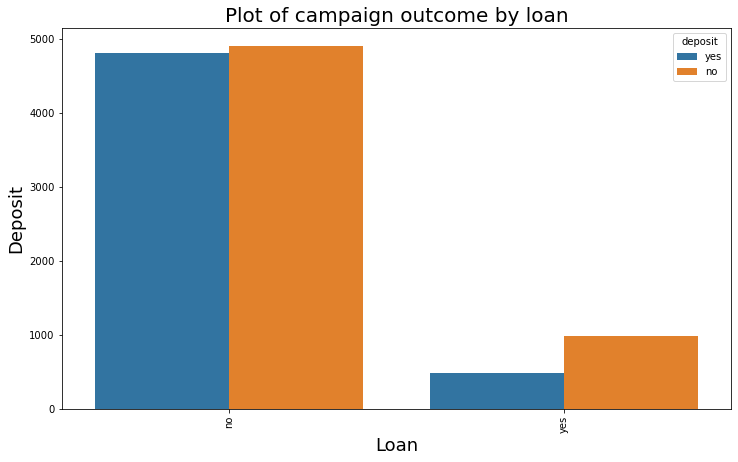

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(data=bank_data, x='loan', order = bank_data['loan'].value_counts().index, hue='deposit')
plt.xticks(rotation=90)
plt.title("Plot of campaign outcome by loan",fontsize=20)
plt.xlabel('Loan', fontsize=18)
plt.ylabel('Deposit', fontsize=18)
plt.show()
# it can be seen that people who were not having any loan earlier were more influnced by the campaign and people who already had loan refrained from making any deposit.

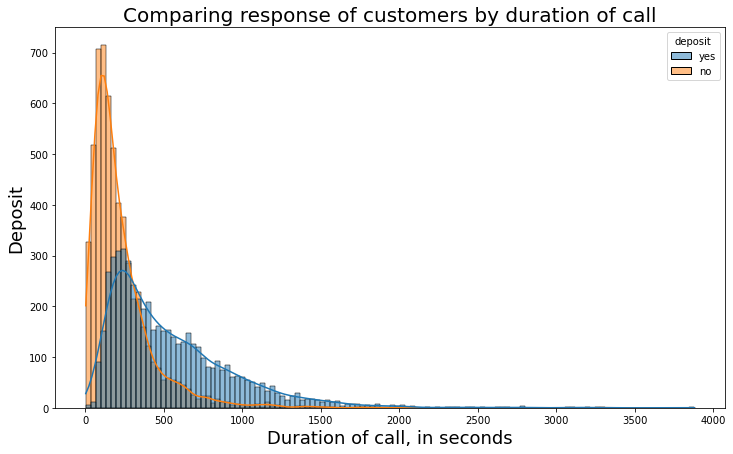

In [17]:
plt.figure(figsize=(12,7))
sns.histplot(data=bank_data, x='duration', hue='deposit', kde=True)
plt.title('Comparing response of customers by duration of call',fontsize=20)
plt.xlabel('Duration of call, in seconds', fontsize=18)
plt.ylabel('Deposit', fontsize=18)
plt.show()
# from the following graph it can be noticed that mean of yes(deposit) is more than no(deposit) and in order to have yes response call duration should not be too short.